## Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
from pathlib import Path
from keras.preprocessing import image

Using TensorFlow backend.


## Reading images from database and combining them together with labels

In [5]:
p=Path("Images/")
dirs = p.glob("*")

labels_dict = {"cat":0,"dog":1,"horse":2,"human":3}
image_data =[]
labels=[]

for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1][:-1]

    for img_path in folder_dir.glob("*.jpg"):
        
        #reading images in a standard size of 100 X 100 
        img = image.load_img(img_path,target_size=(100,100))
        
        img_array=image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])

In [11]:
print(labels)

[3 3 0 0 1 3 0 0 1 2 0 0 0 1 2 3 1 3 1 0 0 0 1 0 0 3 0 2 3 1 1 1 2 3 0 1 3
 3 1 0 1 3 1 2 2 2 2 0 2 2 3 0 2 0 0 1 0 2 3 2 2 1 3 3 0 3 3 0 3 3 1 1 0 1
 2 3 0 2 1 1 2 1 3 0 2 1 3 0 0 1 2 3 3 1 3 3 2 2 1 0 2 0 2 3 3 2 0 3 3 2 3
 2 2 2 2 2 1 3 3 1 2 2 0 2 1 2 2 1 0 1 1 0 0 1 2 3 1 0 2 3 0 3 0 1 0 2 0 0
 2 1 2 2 3 1 0 3 2 3 2 1 3 0 1 1 3 3 3 3 1 1 1 3 2 3 0 3 0 3 3 3 1 0 3 0 2
 2 0 0 2 1 2 3 1 2 3 2 1 0 3 2 3 0 0 0 2 0 0 2 3 3 0 3 3 1 3 1 2 1 0 2 3 0
 1 0 1 2 2 0 3 0 0 2 2 0 1 3 0 2 2 3 0 0 3 3 3 3 0 0 1 3 3 2 1 2 1 1 3 3 2
 2 0 1 0 1 3 2 2 3 0 3 0 3 0 3 0 2 0 1 0 1 0 0 0 1 0 1 1 0 3 2 0 1 0 2 1 1
 3 0 0 0 2 1 3 2 1 1 1 3 2 2 0 3 3 0 3 2 2 3 2 3 2 3 3 1 0 2 1 2 3 1 2 1 1
 3 3 2 3 1 2 2 2 3 2 1 3 1 2 2 3 3 1 2 2 3 3 2 2 2 2 0 0 1 2 1 2 3 2 1 0 2
 1 2 0 2 0 0 2 2 3 3 0 0 0 2 2 1 0 0 0 2 1 1 0 0 1 0 3 3 0 3 3 2 2 0 1 1 0
 2 1 3 1 2 0 3 2 3 2 0 0 1 2 2 0 1 1 1 1 1 2 3 2 0 1 2 0 3 2 2 1 0 3 1 2 0
 1 3 3 0 1 3 0 1 0 1 1 0 1 2 0 1 0 2 1 3 2 3 1 3 0 1 1 2 2 1 0 0 1 1 0 0 0
 1 1 3 2 2 0 1 3 2 1 2 3 

In [6]:
print(len(image_data))
print(len(labels))

808
808


## Converting the data into a numpy array

In [7]:
image_data = np.array(image_data,dtype='float32')/255.0
labels = np.array(labels)
print(image_data.shape,labels.shape)

(808, 100, 100, 3) (808,)


In [8]:
import random

combined = list(zip(image_data,labels))
random.shuffle(combined)

image_data[:],labels[:] = zip(*combined)

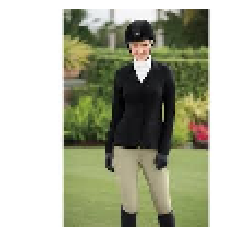

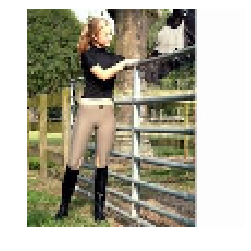

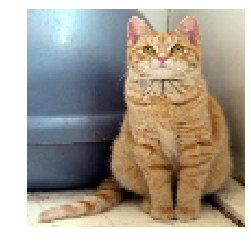

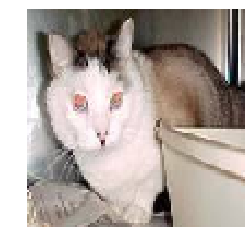

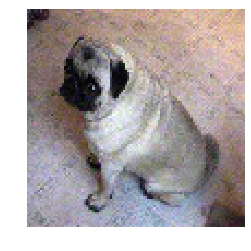

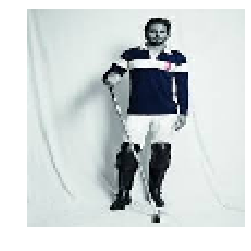

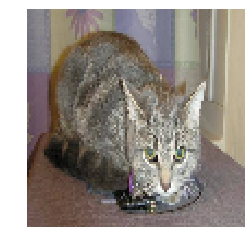

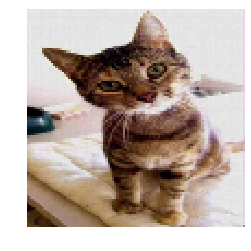

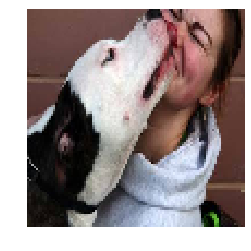

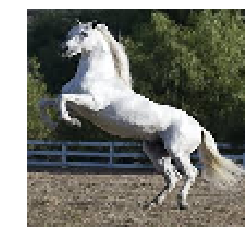

In [9]:
def drawImg(img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    
    return

for i in range(10):
    drawImg(image_data[i])

In [10]:
class SVM:
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #Initial Loss
        
        #Training from here...
        # Weight and Bias update rule that we discussed!
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses
    
    
                
                    
        

## Converting Data for One to One Classification